## Long Island Hedonic Analysis - Draft
### Visualizing the data
#### created by Doug Patton
<br>
If you run the notebook with matplotlib widgets turned on (and installed), you can rotate and zoom in on the 3d plots. 

In [1]:
import island

In [2]:
import numpy as np
import pandas as pd

In [3]:
#from importlib import reload  
#reload(island)

In [4]:
%matplotlib inline
#may be necessary to display plots inline on some systems
#%pylab #interactive graphs in external window
#%matplotlib widget #makes graphs interactive inline

In [5]:
idata_obj=island.IslandData()

In [6]:
#idata_obj.getDataFromCSV() # run once

In [7]:
#idata_obj.doCSVToDict() # run once

In [8]:
idata_obj.makeTimeListArrayList()

In [9]:
#create new real version for each dollar variable using the CPI
baseyear=2015
idata_obj.addRealByCPI(to_year=baseyear)


In [10]:
idata_obj.arrayListToPandasDF()

In [11]:
idata_obj.doDistanceVars()

In [12]:
#idata_obj.justMakeWeights()

In [13]:
for scope in ['year']:
    for est in ['OLS','GM_Error_Het']:
        idata_obj.modeldict['modeltype']=est
        idata_obj.modeldict['NNscope']=scope
        idata_obj.runSpatialModel()

INFO: '2020-07-11 22:58:14.322361' does not exist. Creating a new experiment
INFO: '2020-07-11 22:58:24.212184' does not exist. Creating a new experiment


In [14]:
#idata_obj.printModelSummary()
#idata_obj.printModelSummary(stars=1)

/home/dp/gits/island/island.py:485: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


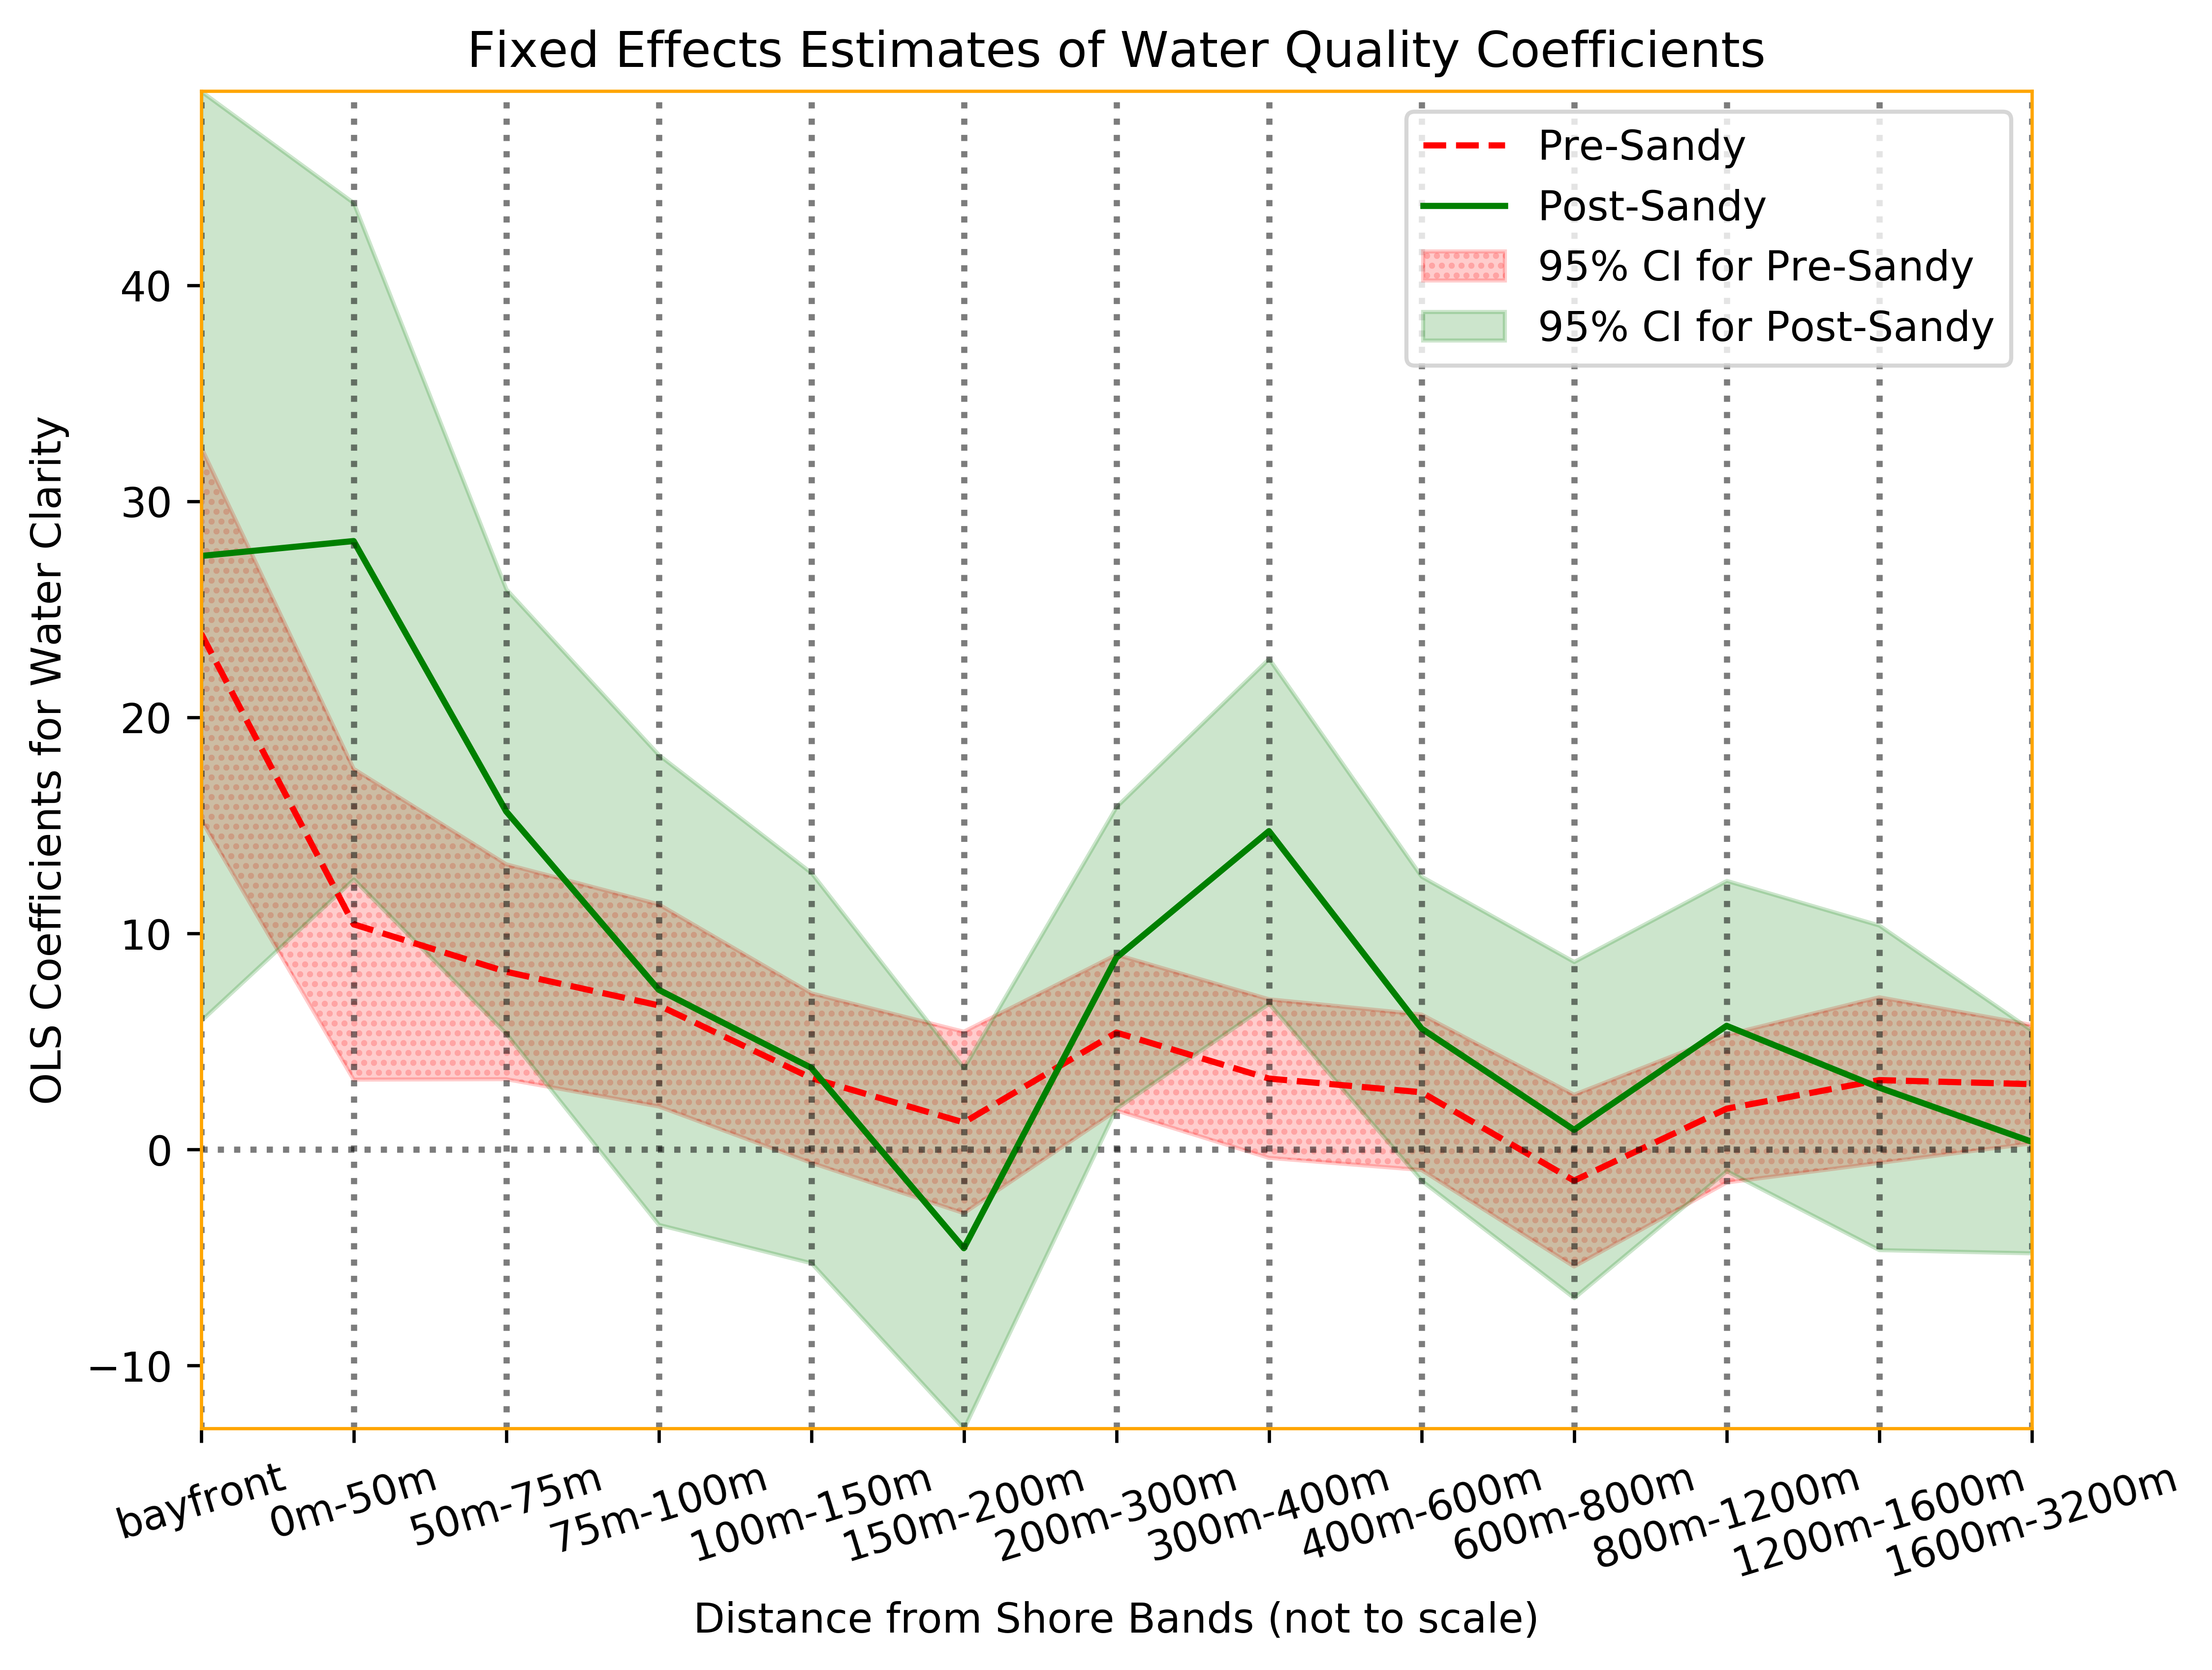

In [15]:
idata_obj.createWQGraph()

/home/dp/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/dp/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/dp/gits/island/island.py:436: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will al

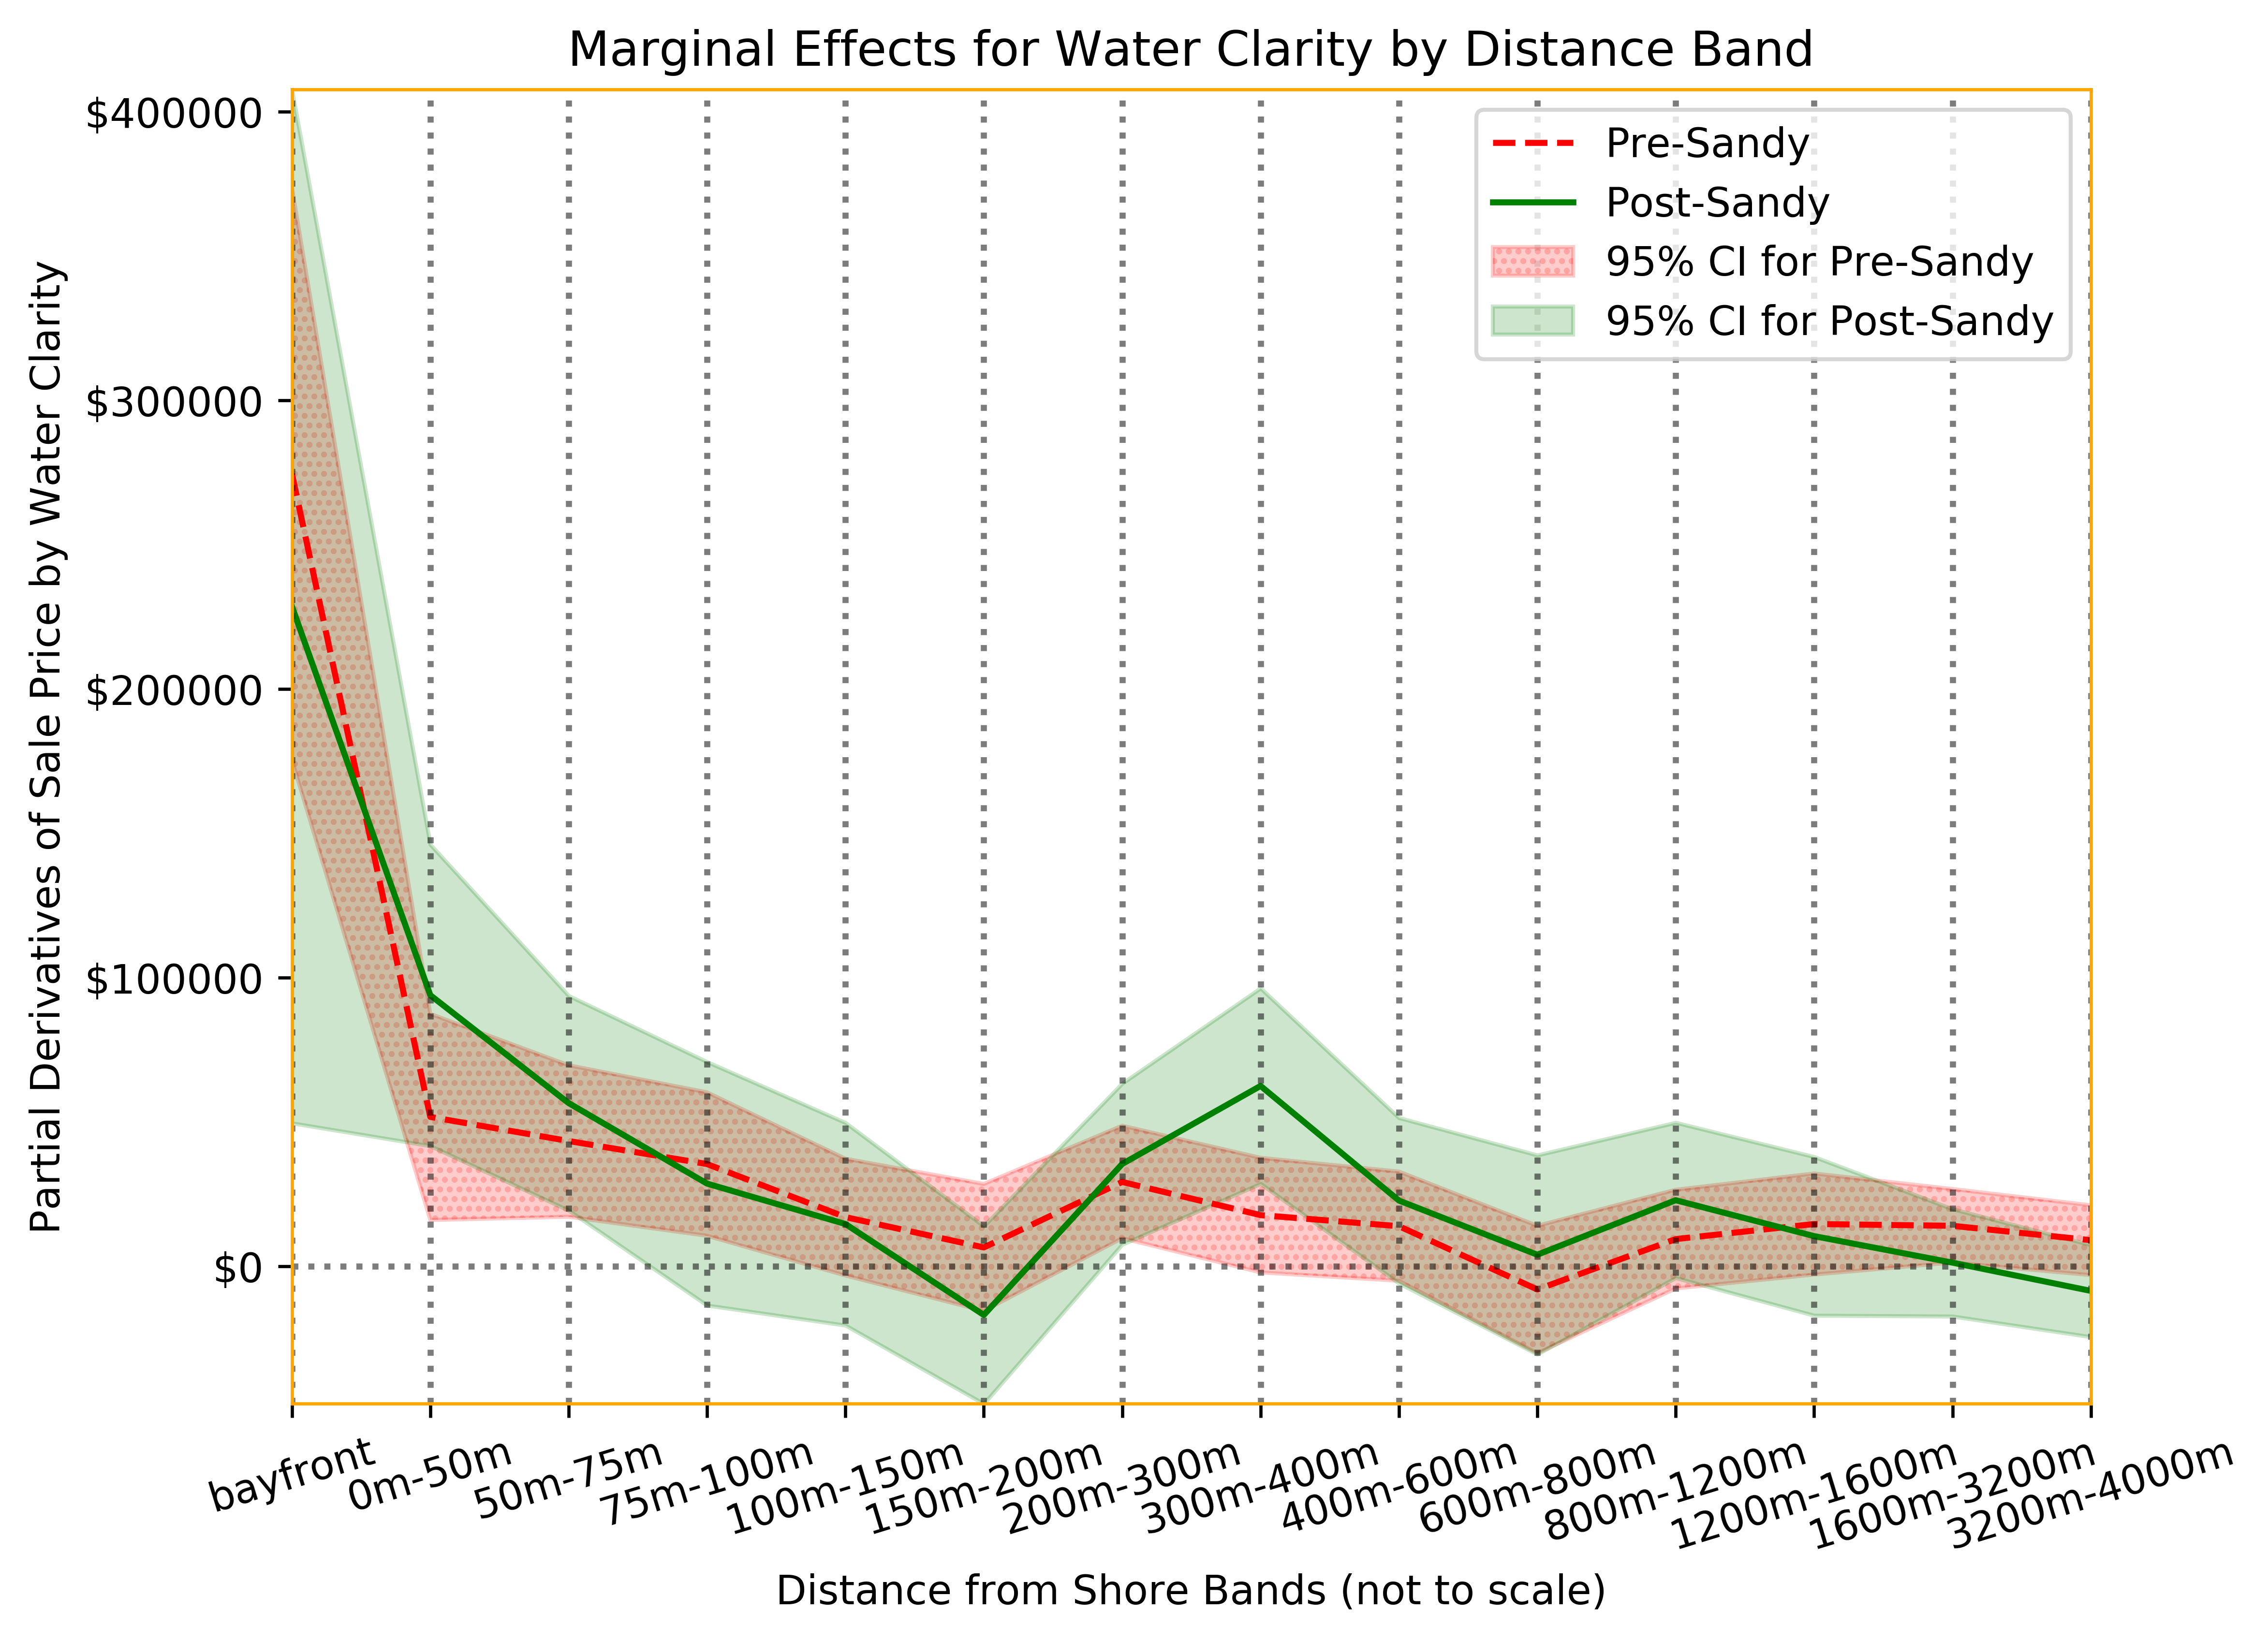

In [16]:
avg_df=idata_obj.createEffectsGraph()

In [17]:
idata_obj.estimateAnnualWQAvgTreatmentEffect()

avg treatment effect wt sum for period0 = 15835.066167910421
at r=0.03, annual benefits for period0 = 475.05198503731265
avg treatment effect wt sum for period1 = 14082.740939811369
at r=0.03, annual benefits for period1 = 422.482228194341


In [18]:
import mlflow
mlflow.end_run()

In [19]:
idata_obj.dist_avg_df.loc[:,'dv_2002']

bayfront                             0.013793
Distance to Shoreline 0m-50m         0.005435
Distance to Shoreline 50m-75m        0.011876
Distance to Shoreline 75m-100m       0.005051
Distance to Shoreline 100m-150m      0.007194
Distance to Shoreline 150m-200m      0.010934
Distance to Shoreline 200m-300m      0.010495
Distance to Shoreline 300m-400m      0.014085
Distance to Shoreline 400m-600m      0.008137
Distance to Shoreline 600m-800m      0.017094
Distance to Shoreline 800m-1200m     0.008712
Distance to Shoreline 1200m-1600m    0.010864
Distance to Shoreline 1600m-3200m    0.008894
Distance to Shoreline 3200m-4000m    0.010974
Name: dv_2002, dtype: float64

In [20]:
newdf=idata_obj.dist_avg_df.sum()

In [21]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
newdf.loc['sale_year']

28116.149598253094

In [22]:
newdf*.05

sale_year                                     1405.807480
saleprice                                   360581.240955
assessedvalue                               286359.941253
postsandy                                        0.159721
secchi                                           1.245831
secchi*bayfront                                  0.096231
secchi*wateraccess                               0.020487
secchi*waterhouse                                0.116718
totalbathroomsedited                             1.430945
totallivingarea                               1308.276822
parcel_area                                   4742.265802
distance_park                                  494.811365
distance_nyc                                  5733.963358
distance_golf                                 1454.518085
secchi*shorelinedistancedv3_1000                 0.853468
secchi*shorelinedistancedv1000_2000              0.144242
secchi*shorelinedistancedv2000_3000              0.053760
secchi*shoreli